Processing ../analysis/ppmi/60_70/comparison\pd\graph_differences.csv in folder 'pd'...
Processing ../analysis/ppmi/60_70/comparison\prodromal\graph_differences.csv in folder 'prodromal'...
Processing ../analysis/ppmi/60_70/comparison\swedd\graph_differences.csv in folder 'swedd'...


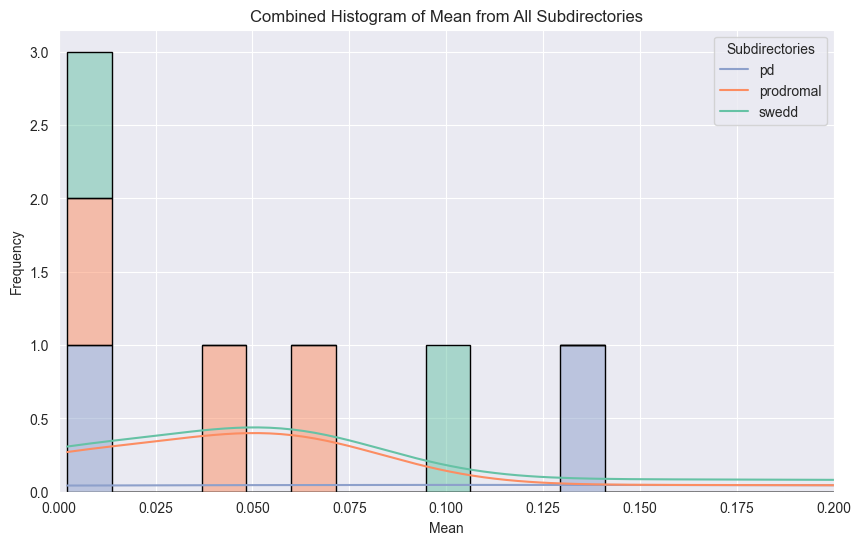

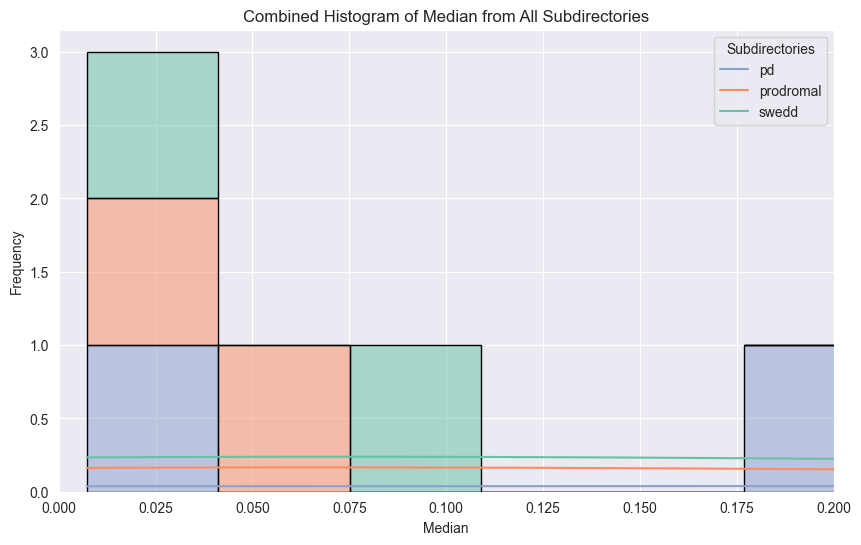

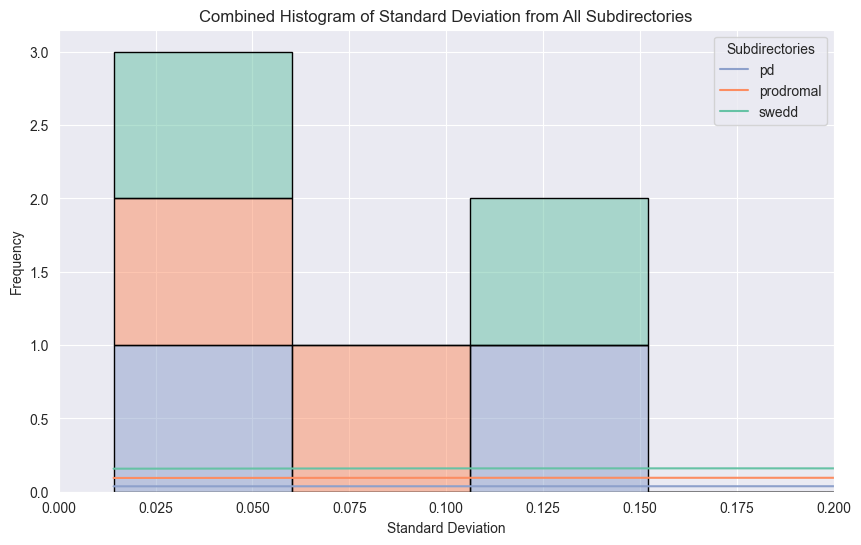

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Plot a combined histogram with data from all subdirectories for a given column
def plot_combined_histogram(data, column, folder_names, title, xlabel):
    plt.figure(figsize=(10, 6))

    # Plot data for each subdirectory, distinguishing by color
    sns.histplot(data, x=column, hue='Folder', bins=50, kde=True, multiple='stack', palette='Set2', edgecolor='black')

    # Set custom limits for the x-axis based on the range of values (adjust as necessary)
    plt.xlim(0, 0.2)  # Limit the x-axis from 0 to 0.2 (adjust according to your data range)

    # Create a custom legend with folder names
    plt.legend(title="Subdirectories", loc='upper right', labels=folder_names)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Get all subdirectories from a directory
def get_subdirectories(parent_dir):
    return [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# Function to process the graph_differences.csv file and return the data with folder names
def process_graph_differences_file(file_path, folder_name):
    data = load_data(file_path)

    # Verifica se la colonna 'Metric', 'Mean', 'Median', 'Standard Deviation' esistono nel file
    if 'Metric' not in data.columns or 'Mean' not in data.columns or 'Median' not in data.columns or 'Standard Deviation' not in data.columns:
        print(f"Warning: Missing columns in {file_path}. Skipping this file.")
        return None

    # Add the folder name as a new column
    data['Folder'] = folder_name
    return data

# Main function to visualize data from all subdirectories (only graph_differences.csv)
def visualize_graph_differences(base_dir):
    # Get all subdirectories
    subdirectories = get_subdirectories(base_dir)

    # List to store data from all subdirectories
    all_data = []

    # Loop through each subdirectory and process the graph_differences.csv file
    for folder_name in subdirectories:
        # Construct the path to the graph_differences.csv file
        file_path = os.path.join(base_dir, folder_name, 'graph_differences.csv')

        # Check if the file exists in the subdirectory
        if os.path.exists(file_path):
            print(f"Processing {file_path} in folder '{folder_name}'...")

            # Process the file and add the data to the list
            data = process_graph_differences_file(file_path, folder_name)
            if data is not None:
                all_data.append(data)
        else:
            print(f"File {file_path} not found in folder '{folder_name}'")

    # Combine all data into a single DataFrame
    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)

        # Plot the combined histogram for Mean
        plot_combined_histogram(combined_data, 'Mean', subdirectories, 'Combined Histogram of Mean from All Subdirectories', 'Mean')

        # Plot the combined histogram for Median
        plot_combined_histogram(combined_data, 'Median', subdirectories, 'Combined Histogram of Median from All Subdirectories', 'Median')

        # Plot the combined histogram for Standard Deviation
        plot_combined_histogram(combined_data, 'Standard Deviation', subdirectories, 'Combined Histogram of Standard Deviation from All Subdirectories', 'Standard Deviation')
    else:
        print("No valid data found to visualize.")

# Path to the parent directory containing the subdirectories
base_directory = '../analysis/ppmi/60_70/comparison'

# Visualize data from all subdirectories
visualize_graph_differences(base_directory)
